In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [10]:
# 데이터 준비
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

# print( diabetes.keys() ) # diabetes에 포함된 정보의 종류
# print( diabetes['DESCR'] )
# print( diabetes["feature_names"] )
# print( diabetes['target'] )

X = diabetes["data"]
y = diabetes["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 훈련 / 테스트 분할
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(331, 10) (331,) (111, 10) (111,)


In [17]:
# KNN 모델
from sklearn.neighbors import KNeighborsRegressor

scores = []
for n in np.arange(1, 10, 2):
    knn = KNeighborsRegressor(n_neighbors=n)

    knn.fit(X_train, y_train) # 훈련
    train_score = knn.score(X_train, y_train) # 훈련데이터로 모델 평가
    test_score = knn.score(X_test, y_test) # 테스트데이터로 모델 평가

    # print(n, ":", train_score, test_score)
    scores.append((n, train_score, test_score))


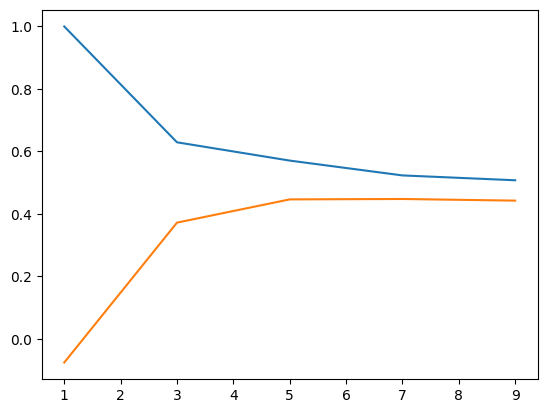

In [20]:
scores_df = pd.DataFrame(scores, columns=['이웃갯수', '훈련점수', "테스트점수"])
# print( scores_df )

plt.plot(scores_df["이웃갯수"], scores_df["훈련점수"])
plt.plot(scores_df["이웃갯수"], scores_df["테스트점수"])
plt.show()

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

test_predicted_y = knn.predict(X_test)
train_predicted_y = knn.predict(X_train)

print( np.mean(y), np.std(y) )
mean_absolute_error(y_train, train_predicted_y), mean_absolute_error(y_test, test_predicted_y)

152.13348416289594 77.00574586945044


(43.61933534743203, 43.7017017017017)